# HW2

## Objective

<li>To practice working with Pandas Series</li>
<li>Overview of the Close series of the Nvedia stock</li>
<li>Find Largest one day drops in shares</li>
<li>Find days in which the closing price has increased by at least 60% within the 9 preceding trading sessions </li>
<li>Find  the worst possible "buy&sell" operation</li>

<b>Solution:</b> 
<ul>
<li>The company choose is <b>NVIDIA </b> </li>
<li>I have used pandas datareader to get the live content!!</li>
<li>The data has been extracted from Yahoo Finance</li>
</ul>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas
import pandas_datareader
import datetime as dt

In [3]:
def readData(startDate,endDate,compTicker):
    dataF = pandas_datareader.DataReader(compTicker,"yahoo",startDate,endDate)
    return dataF

In [6]:
start = dt.datetime(1982,1,1)
end = dt.datetime(2018,1,23)
compTicker = 'NVDA'
dataFrame = readData(start,end,compTicker)
dataFrame.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.521034,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.680380,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.550005,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.545177,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.540348,5688000


In [7]:
dataFrame.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.521034,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.680380,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.550005,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.545177,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.540348,5688000


In [8]:
dataFrame.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4783.000000,4783.000000,4783.000000,4783.000000,4783.000000,4.783000e+03
mean,23.492112,23.889588,23.069174,23.497564,22.699728,1.628107e+07
std,35.401313,35.825240,34.880415,35.411907,35.508608,1.192974e+07
min,1.395833,1.421875,1.333333,1.364583,1.265113,4.920000e+05
25%,8.653646,8.930000,8.416667,8.636667,8.007107,8.822350e+06
50%,14.060000,14.333333,13.810000,14.050000,13.053655,1.367780e+07
75%,20.370000,20.700001,20.040000,20.393334,19.330982,2.034055e+07
max,239.039993,240.490005,235.100006,238.910004,238.910004,2.307714e+08


In [14]:
closingPrices = dataFrame['Close']

In [15]:
closingPrices.tail()

Date
2018-01-18    224.440002
2018-01-19    230.110001
2018-01-22    233.690002
2018-01-23    238.910004
2018-01-24    235.800003
Name: Close, dtype: float64

In [16]:
closingPrices.max()

238.91000400000001

In [17]:
closingPrices.nlargest(1)

Date
2018-01-23    238.910004
Name: Close, dtype: float64

In [18]:
closingPrices.head()

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.671875
1999-01-27    1.666667
1999-01-28    1.661458
Name: Close, dtype: float64

In [19]:
arrPriceList = closingPrices[closingPrices.sort_values(ascending = False)]

In [20]:
arrPriceList.head(1)

Close
238.910004   NaN
Name: Close, dtype: float64

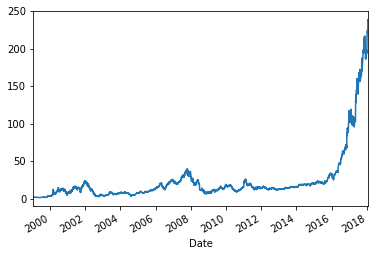

In [21]:
%matplotlib inline 
closingPrices.plot();

## Problem

### Question 1

What was the closing price on Jul 2, 2012?

In [22]:
closingPrices['2012-7-2']

13.449999999999999

### Question 2
Find the ten largest one-day % drops (in % compared to the closing cost of the previous trading day). Make sure that your output is a Series object that shows both date and the % drop.

In [23]:
drop=(closingPrices.shift(1)-closingPrices)/closingPrices.shift(1)

In [126]:
drop.nlargest(10)

Date
2004-08-06    0.352335
2002-07-31    0.317509
2008-07-03    0.307266
2000-03-14    0.262144
2002-11-08    0.219244
2003-08-08    0.196891
2008-02-14    0.163212
2000-11-30    0.160622
2002-06-19    0.156648
2001-01-05    0.149715
Name: Close, dtype: float64

<b> Solution:</b>
<ul>
<li>Above are the 10 largest one-day drops for <b>NVIDIA </b> shares!</li>
<li>shift() in closingPrices.shift(1) is used to extract the closing price from the previous day! </li>
<li>Finally the percentage change formula has been applied which is 
((Price Sold - Purchase Price) ÷ (Purchase Price))*100</li>
</ul>

### Question 3
In which days did we observe that the price has increased of at least 60% within the 9 preceding trading sessions? Report your result as a Series (d,gain) where d is the trading session date when the increase was observed and gain is the maximum percentage gain (%) observed over the 9 days preceding session d. Hint: use a rolling minimum

In [30]:
rol = stock.rolling(10).min()

In [31]:
gain=(closingPrices-rol)/rol>0.6

In [38]:
gain.head(5)


Date
1999-01-22    False
1999-01-25    False
1999-01-26    False
1999-01-27    False
1999-01-28    False
Name: Close, dtype: bool

In [113]:
q =((closingPrices[gain] - rol[gain]) / rol[gain] * 100).nlargest(10)

In [114]:
q

Date
2000-03-13    157.605178
2000-03-10    103.667739
2000-03-14     90.075506
2000-03-15     82.308515
2000-02-18     77.011484
2000-03-09     73.112067
2000-03-17     70.726503
2001-10-12     69.304849
2001-10-15     68.551093
2000-02-22     64.263296
Name: Close, dtype: float64

### Question 4


What was the worst possible "buy&sell" operation? Find the two days x and y so that the % loss resulting from buying in x and selling in y (with y after x) is maximized. Your code should work for any data. Hint: the method cummin returns the minimum value encountered so far. Make sure to return the trading days x and y, as well as the % loss resulting from buying in x and selling in y.

In [142]:
min=closingPrices.sort_index(ascending=False).cummin()
min.head(5)

Date
2018-01-24    235.800003
2018-01-23    235.800003
2018-01-22    233.690002
2018-01-19    230.110001
2018-01-18    224.440002
Name: Close, dtype: float64

The cummin function is used to calculate the Cumulative mean.



In [136]:
x = ((closingPrices - min) / min).nlargest(1).index[0]
x

Timestamp('2002-01-03 00:00:00')

X calculates the date in which the share closing price was min

In [137]:
y = closingPrices[closingPrices == min[x]].index[0]
y

Timestamp('2002-10-09 00:00:00')

Y calculates  the date in which the share closing price was max

In [138]:
print('The worst day to buy NVDA stocks was ' + str(x) +', when the price per stock was ' + str(closingPrices[x]))
print('The worst day to sell NVDA stocks was ' + str(y) +', when the price per stock was ' + str(closingPrices[y]))


The worst day to buy NVDA stocks was 2002-01-03 00:00:00, when the price per stock was 23.903334
The worst day to sell NVDA stocks was 2002-10-09 00:00:00, when the price per stock was 2.456667


In [139]:
print('The loss incured in the transaction was ' + 
str(((closingPrices[x] - closingPrices[y])  / closingPrices[x])*100) + '%')

The loss incured in the transaction was 89.7224922682%


<b> Conclusion:</b>
<ul>
<li>Hence the loss incured for the above requirement was around 90%  </li>

</ul>
